In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from nltk import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfTransformer
import re
from sklearn.feature_extraction.text import CountVectorizer
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import TruncatedSVD
from lime.lime_tabular import LimeTabularExplainer
import requests
import warnings
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import time 

In [2]:
file_names_fake = pd.read_csv('Fake.csv')
file_names_fake['real'] = 'Fake'
file_names_true = pd.read_csv('True.csv')
file_names_true['real'] = 'True'
file_names = file_names_fake.append(file_names_true, ignore_index=True)
file_names.head()

,title,text,subject,date,real
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [3]:
data_train, data_test = train_test_split(file_names, test_size=0.5, random_state=25)
sample_size = 2000
data_train = data_train.sample(sample_size)
data_test = data_test.sample(sample_size)

In [4]:
def manual_stopword_filtering(stopwords_en): 
    stopwords_en.append('reuter')
    stopwords_en.append('said')
    stopwords_en.append('Reuters')
    stopwords_en.append('via')
    stopwords_en.append('imag')
    stopwords_en.append('https')
    stopwords_en.append('com')
    stopwords_en.append('one')
    stopwords_en.append('u')
    stopwords_en.append('also')
    stopwords_en.append('would')
    stopwords_en.append('featur')
    stopwords_en.append('pic')
    stopwords_en.append('us')
    stopwords_en.append('wednesday')
    stopwords_en.append('friday')
    stopwords_en.append('monday')
    stopwords_en.append('tuesday')
    stopwords_en.append('saturday')
    stopwords_en.append('sunday')
    stopwords_en.append('thursday')
    stopwords_en.append('getti')
    stopwords_en.append('read')
    stopwords_en.append('gop')
    stopwords_en.append('watch')
    stopwords_en.append('donald')
    stopwords_en.append('trump')
    stopwords_en.append('hillari')
    stopwords_en.append('mr')
    stopwords_en.append('accord')
    stopwords_en.append('america')
    stopwords_en.append('seem')
    stopwords_en.append('youtub')
    stopwords_en.append('21st')
    stopwords_en.append('2017')
    stopwords_en.append('www')
    return stopwords_en

stopwords_en = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
stopwords_en_filtered = manual_stopword_filtering(stopwords_en)
porter = PorterStemmer()
stopwords_en_porter = [porter.stem(x) for x in stopwords_en]
stopwords_en_filtered_poter = [porter.stem(x) for x in stopwords_en_filtered]
def porter_tokenizer(text):
    ''' Esta función se utiliza cuando se sobre escribe el proceso de tokenización para que se pueda 
    obtener también la raíz de la palabra.'''
    words = word_tokenize(text)
    words = [re.sub('[^A-Za-z0-9]+', '', word) for word in words]  # remover los caracteres especiales
    words = [word.replace(' ', '') for word in words] #remover los espacios en blanco
    words = [word for word in words if word != '']
    words = [PorterStemmer().stem(word) for word in words] # obtener la raiz de las palabras
    words = [word for word in words if word not in stopwords_en_porter] # remover las stopwords
    return words

In [5]:
count_vectorizer= CountVectorizer(lowercase = True, strip_accents='unicode', \
                            ngram_range = (1, 3), min_df = 3)
count_vectorizer.fit(data_train['text'])

X_train_sparse = count_vectorizer.transform(data_train['text'])
X_test_sparse = count_vectorizer.transform(data_test['text'])

In [6]:
tfidft = TfidfTransformer()
tfidft.fit(X_train_sparse)

X_train = tfidft.transform(X_train_sparse)
X_test = tfidft.transform(X_test_sparse)
y_train = data_train.real
y_test = data_test.real

In [7]:
reg_model = LogisticRegression(C = 7, solver="saga", l1_ratio=0.5 , penalty="elasticnet", n_jobs=-1)
reg_model.fit(X_train, y_train)
reg_model.score(X_test, y_test)

0.982

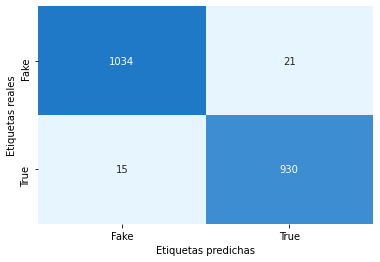

In [8]:
myColors = ((0.90, 0.96, 1, 1), (0.70, 0.87, 1, 1), (0, 0.40, 0.75, 0.88))
cmap = LinearSegmentedColormap.from_list('Custom', myColors,10)
axis_labels = np.sort(y_test.unique())
cm_rlog = confusion_matrix(y_test, reg_model.predict(X_test))
sns.heatmap(cm_rlog, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap, fmt='g')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [9]:
import pickle

# Escritura del modelo
with open('fakenews_count_vectorizer.pkl', 'wb') as f_model:
    pickle.dump(count_vectorizer, f_model)

with open('fakenews_tfidft.pkl', 'wb') as f_model:
    pickle.dump(tfidft, f_model)


with open('fakenews_model.pkl', 'wb') as f_model:
    pickle.dump(reg_model, f_model)


In [10]:
# Lectura del modelo
with open('fakenews_count_vectorizer.pkl', 'rb') as f_model:
        count_vectorizer_t = pickle.load(f_model)

with open('fakenews_tfidft.pkl', 'rb') as f_model:
        tfidft_t = pickle.load(f_model)

with open('fakenews_model.pkl', 'rb') as f_model:
        model_reg_t = pickle.load(f_model)


In [11]:
def mi_modelo_test(text):
    # Lectura del modelo
    with open('fakenews_count_vectorizer.pkl', 'rb') as f_model:
            count_vectorizer_t = pickle.load(f_model)

    with open('fakenews_tfidft.pkl', 'rb') as f_model:
            tfidft_t = pickle.load(f_model)

    with open('fakenews_model.pkl', 'rb') as f_model:
            model_reg_t = pickle.load(f_model)

    text_df = pd.Series(data = text)
    p1 = count_vectorizer_t.transform(text_df)
    p2 = tfidft_t.transform(p1)

    result = model_reg_t.predict(p2)
    result_proba = np.round(model_reg_t.predict_proba(p2),2)
    
    return result_proba

In [12]:
## NOTICIA TRUE
#mi_modelo_test("LONDON (Reuters) - Britain’s foreign minister Boris Johnson has arrived in the United States to meet close advisers to President-elect Donald Trump and senior Congressional leaders to discuss ties between the countries. Last June’s vote to leave the European Union has left Britain facing some of the most complicated negotiations since World War Two, with the country keen to deepen ties with the United States and other nations to show that Brexit will not diminish its standing in the world. Johnson’s visit, which was not flagged in advance, is part of Prime Minister Theresa May’s strategy to improve relations with Trump’s team after the president-elect irritated the government by saying that outspoken anti-EU campaigner Nigel Farage would be a good choice for Britain’s ambassador to Washington.  May’s two most senior aides made a secret trip to the United States last month. “Following the successful meeting last month between the Prime Minister’s chiefs of staff and President-elect Donald Trump’s team, Foreign Secretary Boris Johnson is undertaking a short visit to the U.S. for meetings with close advisers to the president-elect and senior Congressional leaders,” a spokesman for Britain’s foreign ministry said in a statement on Sunday. “The discussions will be focused on UK-U.S. relations and other foreign policy matters.” May had told Sky News earlier in the day that she was sure that Britain and the United States would build on their close ties and that their “special relationship” would endure despite describing some of his comments about women as “unacceptable”. ")
## NOTICIA FAKE
mi_modelo_test("There has to something more to this story than what we re being told. If there isn t more to this story, then Atlanta Airport officials and Georgia Power are going to have some explaining to do A complete power outage at the nation s busiest airport, the Hartsfield-Jackson Atlanta International Airport, grounded flights Sunday afternoon, threatening to cause a holiday travel nightmare for fliers across the country just over a week before Christmas.Thousands of passengers were stranded and flights were grounded or delayed as a power outage crippled Atlanta's Hartsfield-Jackson Airport   the world's busiest airport pic.twitter.com/WpWQLGu5GD  EAGLE WINGS (@NIVIsa4031) December 17, 2017Georgia Power said that repairs are  well underway  at the airport and power is expected to be restored around midnight on Sunday, and the airport tweeted that  Power on Concourse F is back ON! Washington Examiner s Byron York tweeted only two hours ago, that  no one seems to know why  the power outage happened.The Atlanta airport story is huge. By far the nation's largest airport, it just goes dark, operations shut down. Thousands stranded, in very difficult situations. And nobody seems to know why.  Byron York (@ByronYork) December 17, 2017 We are working with great urgency w/ @Georgia Power to restore power through rest of airport,  the tweet read.According to FlightAware.com, 1,161 flights have been canceled at Hartsfield-Jackson as of 8:20 p.m. ET.Delta passengers were not happy with how things were being handled, especially the passengers who were stuck on the tarmac for several hours, unable to disembark from the planes:Oh. My. God. Just left ATL airport last night at midnight after 15 hours of travel. If I had been stuck against my will in my plane on tarmac..Gives me anxiety just thinking about it. That s A LOT of ppl in tight space.  SidNey (@OhGoSquid) December 18, 2017Fox News reported on the outage:Power outage at Atlanta airport causes 'pandemonium,' grounds flights https://t.co/Och4XslbLi pic.twitter.com/VX5lnpZMFQ  Fox News (@FoxNews) December 17, 2017Georgia Power said in a statement Sunday evening that  the issue may have involved a fire which caused extensive damage in a Georgia Power underground electrical facility. The airport said power had been restored to one of its six concourses around 7:30 p.m., about seven hours after the initial outage, and Georgia Power said it expects to have power fully restored to the airport by midnight.CNBC News reporter Ethan Kraft reports that Chick-fil-A s CEO Dan Cathy will coordinate meals for thousands of stranded passengers at the airport:Atlanta Mayor Kasim Reed says he spoke with Chick-fil-A CEO Dan Cathy to coordinate meals for thousands of stranded passengers at #ATLairport, who have been in the dark since 2p ET  Ethan Kraft (@ethan_kraft) December 18, 2017Fire crews were able to extinguish the fire and had begun assessing damage and beginning repairs, but they had not yet been able to ascertain the cause of the blaze, the utility said.  FOX NewsNBC News  Airport officials said a large portion of the facility had been affected and that repair teams had been working to address the situation since around 1:30 p.m. ET.Not everyone is buying the  fire  story however. This Twitter user believes that terror threat is the cause for the evacuation:The #atlairport has been evacuated, passangers are standing outside on the tarmac, no one is allowed to leave. I think a high level #Hivite was trying to get away, or they've disrupted a major terror attack. It's not being reported by @CNN (headquarters in Atlanta) #MediaBlackOut  Sarah Ruth Ashcraft (@SaRaAshcraft) December 17, 2017Many citizens are questioning the story they are being told about a simple power outage, and wondering why, in the largest airport in the world, there isn t any back up power?https://twitter.com/tonyabonya/status/942576639887663104Officials with the Atlanta Police Department told WSB-TV the airport is evacuating travelers inside.A spokesperson told The Associated Press that no areas outside the airport were affected by the outage. However, flights at Chicago airports O Hare International and Midway both have canceled flights   but it s not yet clear if they were canceled due to Atlanta s outage. Dealing with the power outage at the Atlanta airport was actually insane and I'll post other scary videos later. But the staff was having to slide down the escalators to help people and it was amusing. Finally in the car headed home. #atlantaairport #atl #atlantaA post shared by  sarahmanleyy (@sarahmanleyy) on Dec 17, 2017 at 2:54pm PSTDelta Airlines, which is headquartered in Atlanta, said it had canceled approximately 900 mainline and Delta Connection flights. Passengers should check the status of their flights, the airline said. Pending full resumption of power, Delta anticipates a near-full schedule Monday in Atlanta, though some delays and cancellations can be expected,  the airline said on its website.The airline said it would issue a waiver to those who were traveling through Atlanta with the airline on Dec. 17 or 18. The airline also said it would give travelers a refund if they would like to cancel their trip because their flight was canceled or delayed more than 90 minutes.Those arriving for their flights were met with long lines and a pitch dark airport. No escalators, elevators or information screens were operational.Brian Moote, 36, the morning host of an Atlanta radio show, said he was returning home on a flight from Dallas when the power went out in the airport. Moote said he and his fellow passengers had been stuck in their plane on the tarmac for nearly six hours, beginning at around 12:30 p.m. ET.")


array([[0.75, 0.25]])

In [15]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome(service=Service(ChromeDriverManager().install()),options=chrome_options)

def get_text_from_url_bbc(url):
    wd.get(url)

    time.sleep(1)

    soup = BeautifulSoup(wd.page_source)
    text = soup.find_all('div', {'data-component': 'text-block'}) #(?P<text>\>(.*?)\<)
    text = reversed(text) 
    text2 = ""
    for i in text:
        try:
            text2 = i.text+text2
        except:
            text2 = ""+text2
    return text2    



====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST chromedriver version for 102.0.5005 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/102.0.5005.61/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Lucas Choconi\.wdm\drivers\chromedriver\win32\102.0.5005.61]


In [17]:
url_test = "https://www.bbc.com/news/world-asia-61470748"
get_text_from_url_bbc(url_test)

'Hidden away in a residential neighbourhood is one of Afghanistan\'s new "secret" schools - a small but powerful act of defiance against the Taliban. Around a dozen teenage girls are attending a maths class. "We know about the threats and we worry about them," the sole teacher tells us, but she adds, girls\' education is worth "any risk". In all but a handful of provinces in the country, girls\' secondary schools have been ordered to remain closed by the Taliban. At the school we visit, they\'ve done an impressive job trying to replicate a real classroom, with rows of neat blue and white desks. "We do our best to do this secretly," says the female teacher, "but even if they arrest me, they beat me, it\'s worth it." Back in March, it seemed as if girls\' schools were about to reopen. But just an hour or so after pupils began arriving, the Taliban leadership announced a sudden change in policy. For the students at the secret school, and many other teenage girls, the pain is still raw. "I

In [ ]:
from flask import  Flask
from flask import render_template

app = Flask('my__webapp')

def fn_select_proba(value="True"):
    if value == "Fake":
        return 0
    else:
        return 1

@app.route('/reg_model/<text>', methods=['GET'])
def mi_modelo(text):
    # Lectura del modelo
    with open('fakenews_count_vectorizer.pkl', 'rb') as f_model:
            count_vectorizer_t = pickle.load(f_model)

    with open('fakenews_tfidft.pkl', 'rb') as f_model:
            tfidft_t = pickle.load(f_model)

    with open('fakenews_model.pkl', 'rb') as f_model:
            model_reg_t = pickle.load(f_model)

    text_df = pd.Series(data = text)
    p1 = count_vectorizer_t.transform(text_df)
    p2 = tfidft_t.transform(p1)

    result = {"predict": model_reg_t.predict(p2)[0]}
    result_proba = {"predict": np.round(model_reg_t.predict_proba(p2),2)}
    
    return render_template('predict_page.html', predict=result["predict"] , predict_proba=result_proba["predict"][0])  

@app.route('/reg_model_bbc_url/<text>', methods=['GET'])
def mi_modelo_from_url_bbc(text):
    # Lectura del modelo
    with open('fakenews_count_vectorizer.pkl', 'rb') as f_model:
            count_vectorizer_t = pickle.load(f_model)

    with open('fakenews_tfidft.pkl', 'rb') as f_model:
            tfidft_t = pickle.load(f_model)

    with open('fakenews_model.pkl', 'rb') as f_model:
            model_reg_t = pickle.load(f_model)
    
    url_test = text.replace("_slash_forward_", "/")
    text_news = get_text_from_url_bbc(url_test)
    print(text_news)
    text_df = pd.Series(data = text_news)
    p1 = count_vectorizer_t.transform(text_df)
    p2 = tfidft_t.transform(p1)

    result = {"predict": model_reg_t.predict(p2)[0]}
    result_proba = {"predict": np.round(model_reg_t.predict_proba(p2),2)}
    
    return render_template('predict_page.html', predict=result["predict"] , predict_proba=result_proba["predict"][0], text_news_js = text_news)

@app.route('/reg_model/', methods=['GET'])
def home():
    return render_template('home.html')      

@app.route("/test", methods=['GET'])
def hello():
    alive = "La app está viva"
    return alive


app.run(host='0.0.0.0', port = 5017)

 * Serving Flask app "my__webapp" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.0.10:5017/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Jun/2022 23:37:36] "GET /reg_model/ HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2022 23:37:42] "GET /reg_model_bbc_url/https:_slash_forward__slash_forward_www.bbc.com_slash_forward_news_slash_forward_world-asia-61470748 HTTP/1.1" 200 -


Hidden away in a residential neighbourhood is one of Afghanistan's new "secret" schools - a small but powerful act of defiance against the Taliban. Around a dozen teenage girls are attending a maths class. "We know about the threats and we worry about them," the sole teacher tells us, but she adds, girls' education is worth "any risk". In all but a handful of provinces in the country, girls' secondary schools have been ordered to remain closed by the Taliban. At the school we visit, they've done an impressive job trying to replicate a real classroom, with rows of neat blue and white desks. "We do our best to do this secretly," says the female teacher, "but even if they arrest me, they beat me, it's worth it." Back in March, it seemed as if girls' schools were about to reopen. But just an hour or so after pupils began arriving, the Taliban leadership announced a sudden change in policy. For the students at the secret school, and many other teenage girls, the pain is still raw. "It's bee

127.0.0.1 - - [22/Jun/2022 23:37:49] "GET /reg_model/Hidden%20away%20in%20a%20residential%20neighbourhood%20is%20one%20of%20Afghanistan's%20new%20%22secret%22%20schools%20-%20a%20small%20but%20powerful%20act%20of%20defiance%20against%20the%20Taliban.%20Around%20a%20dozen%20teenage%20girls%20are%20attending%20a%20maths%20class.%20%22We%20know%20about%20the%20threats%20and%20we%20worry%20about%20them,%22%20the%20sole%20teacher%20tells%20us,%20but%20she%20adds,%20girls'%20education%20is%20worth%20%22any%20risk%22.%20In%20all%20but%20a%20handful%20of%20provinces%20in%20the%20country,%20girls'%20secondary%20schools%20have%20been%20ordered%20to%20remain%20closed%20by%20the%20Taliban.%20At%20the%20school%20we%20visit,%20they've%20done%20an%20impressive%20job%20trying%20to%20replicate%20a%20real%20classroom,%20with%20rows%20of%20neat%20blue%20and%20white%20desks.%20%22We%20do%20our%20best%20to%20do%20this%20secretly,%22%20says%20the%20female%20teacher,%20%22but%20even%20if%20they%20arrest%20me

Hidden away in a residential neighbourhood is one of Afghanistan's new "secret" schools - a small but powerful act of defiance against the Taliban. Around a dozen teenage girls are attending a maths class. "We know about the threats and we worry about them," the sole teacher tells us, but she adds, girls' education is worth "any risk". In all but a handful of provinces in the country, girls' secondary schools have been ordered to remain closed by the Taliban. At the school we visit, they've done an impressive job trying to replicate a real classroom, with rows of neat blue and white desks. "We do our best to do this secretly," says the female teacher, "but even if they arrest me, they beat me, it's worth it." Back in March, it seemed as if girls' schools were about to reopen. But just an hour or so after pupils began arriving, the Taliban leadership announced a sudden change in policy. For the students at the secret school, and many other teenage girls, the pain is still raw. "It's bee

127.0.0.1 - - [22/Jun/2022 23:38:09] "GET /reg_model_bbc_url/https:_slash_forward__slash_forward_www.bbc.com_slash_forward_news_slash_forward_world-asia-61470748 HTTP/1.1" 200 -


Hidden away in a residential neighbourhood is one of Afghanistan's new "secret" schools - a small but powerful act of defiance against the Taliban. Around a dozen teenage girls are attending a maths class. "We know about the threats and we worry about them," the sole teacher tells us, but she adds, girls' education is worth "any risk". In all but a handful of provinces in the country, girls' secondary schools have been ordered to remain closed by the Taliban. At the school we visit, they've done an impressive job trying to replicate a real classroom, with rows of neat blue and white desks. "We do our best to do this secretly," says the female teacher, "but even if they arrest me, they beat me, it's worth it." Back in March, it seemed as if girls' schools were about to reopen. But just an hour or so after pupils began arriving, the Taliban leadership announced a sudden change in policy. For the students at the secret school, and many other teenage girls, the pain is still raw. "It's bee

Abrimos en un browser esta url (GET)

http://localhost:5017/test


http://localhost:5017/reg_model/  + TEXTO

http://localhost:5017/test2

